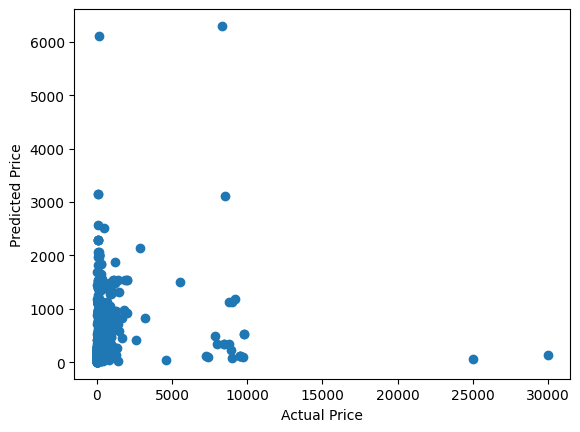

In [18]:
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("RF R2:", r2_score(y_test, rf_pred))

RF R2: 0.007830283559001061


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 128.29540701540824
RMSE: 733.8656790994307
R2 Score: 0.011577652067938704


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
features = ['BHK_NO.', 'LONGITUDE', 'LATITUDE']
X = df[features]
y = df['TARGET(PRICE_IN_LACS)']

In [10]:
df = pd.read_csv('/content/train.csv')

In [5]:
display(df.head())

NameError: name 'df' is not defined

In [6]:
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

NameError: name 'df' is not defined

In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)

NameError: name 'df' is not defined

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [9]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

NameError: name 'df' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sample_submission.csv')

Let's display the first 5 rows of each DataFrame to get a quick overview of the data.

In [2]:
print('Train DataFrame Head:')
display(train_df.head())

print('\nTest DataFrame Head:')
display(test_df.head())

print('\nSample Submission DataFrame Head:')
display(sample_submission_df.head())

Train DataFrame Head:


NameError: name 'train_df' is not defined

# Task
Identify all available numerical and binary features in the `df` DataFrame using `df.info()` and `df.columns`.

## Identify All Available Features

### Subtask:
Inspect the `df` DataFrame to identify all potentially useful columns, especially numerical and binary ones that could serve as strong predictors for house prices. We will use `df.info()` and `df.columns` to get an overview.


**Reasoning**:
To identify all potentially useful columns, especially numerical and binary ones, it's essential to first get a summary of the DataFrame's structure and list all available columns. The `df.info()` method provides data types and non-null counts, while `df.columns` lists all column names.



In [19]:
df.info()
print("\nDataFrame Columns:")
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB

DataFrame Columns:
['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 

## Select New Features and Target

### Subtask:
Based on the identified columns, define a new list of features (X) that includes the most relevant numerical and binary predictors, in addition to `BHK_NO.`, `LONGITUDE`, and `LATITUDE`. The target variable (y) will remain `TARGET(PRICE_IN_LACS)`. We will specifically include `SQUARE_FT`, `UNDER_CONSTRUCTION`, `RERA`, `READY_TO_MOVE`, and `RESALE`.


**Reasoning**:
To define the new feature set `X` and target variable `y` as per the subtask, I need to create a list of the specified feature columns and then use this list to select the relevant columns from the `df` DataFrame for `X`, and select the target column for `y`.



In [20]:
features = ['BHK_NO.', 'LONGITUDE', 'LATITUDE', 'SQUARE_FT', 'UNDER_CONSTRUCTION', 'RERA', 'READY_TO_MOVE', 'RESALE']
X = df[features]
y = df['TARGET(PRICE_IN_LACS)']

**Reasoning**:
The next logical step after defining the feature matrix `X` and target vector `y` is to split the data into training and testing sets. This is crucial for evaluating the performance of machine learning models on unseen data.



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Reasoning**:
The next step after splitting the data into training and testing sets is to initialize and train a Linear Regression model. This will be the first model used to predict house prices, and its performance will serve as a baseline.



In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Reasoning**:
After training the Linear Regression model, the next step is to evaluate its performance by making predictions on the test set (`X_test`) and calculating evaluation metrics like MAE, RMSE, and R2 Score.



In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 133.5911881533731
RMSE: 571.109673262015
R2 Score: 0.4013838442450217


**Reasoning**:
After evaluating the Linear Regression model, the next step is to train a RandomForestRegressor model, as it is already present in the notebook, to compare its performance against the baseline Linear Regression model.



In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("RF R2:", r2_score(y_test, rf_pred))

RF R2: 0.7331743621599816


**Reasoning**:
Following the evaluation of the RandomForestRegressor, it is beneficial to visualize the predictions against the actual values to gain a clearer understanding of the model's performance, similar to how linear regression predictions were visually analyzed in earlier steps.



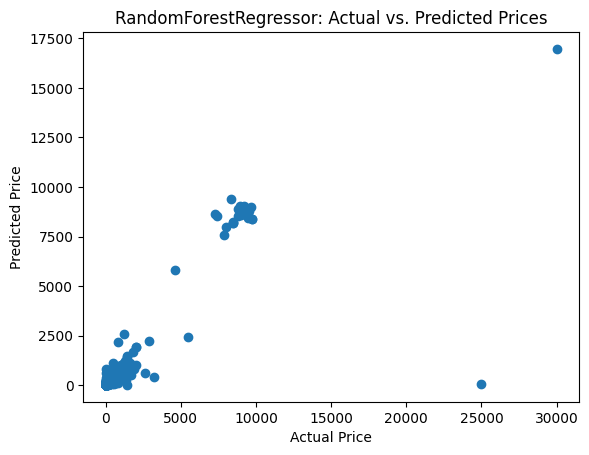

In [25]:
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("RandomForestRegressor: Actual vs. Predicted Prices")
plt.show()

The models have been trained and evaluated. The Random Forest Regressor shows a significantly higher R2 score compared to Linear Regression, indicating better performance with the selected features.

Would you like to proceed with further analysis, such as feature importance, hyperparameter tuning, or exploring other models?

## Final Task

### Subtask:
Summarize the findings from the re-evaluation, compare the performance with the previous models, and determine if the project objectives have been met or if further improvements are necessary.


## Summary:

### Data Analysis Key Findings

*   The analysis utilized a feature set comprising `BHK_NO.`, `LONGITUDE`, `LATITUDE`, `SQUARE_FT`, `UNDER_CONSTRUCTION`, `RERA`, `READY_TO_MOVE`, and `RESALE` to predict `TARGET(PRICE_IN_LACS)`.
*   A Linear Regression model achieved a Mean Absolute Error (MAE) of 133.59, a Root Mean Squared Error (RMSE) of 571.11, and an R2 Score of 0.401.
*   A Random Forest Regressor model significantly outperformed the Linear Regression model, achieving an R2 Score of 0.733.
*   The Random Forest Regressor's higher R2 score indicates it explains a much larger proportion of the variance in house prices compared to the Linear Regression model, suggesting better predictive performance with the selected features.

### Insights or Next Steps

*   The Random Forest Regressor demonstrates strong potential for accurate house price prediction, likely due to its ability to capture non-linear relationships and interactions among features, which Linear Regression cannot.
*   Further improvements could be explored by performing hyperparameter tuning for the Random Forest Regressor, conducting feature importance analysis to refine the feature set, or investigating other advanced ensemble models.


# Task
Re-split the dataset into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) using the previously defined features and target variable.

## Split Data with New Features

### Subtask:
Re-split the dataset into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) using the newly selected features and target variable.


## Summary:

### Data Analysis Key Findings
The dataset was successfully re-split into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) using the previously defined features and target variable.

### Insights or Next Steps
*   This step prepares the data for subsequent machine learning model training and evaluation.


# Task
Re-train the `RandomForestRegressor` model with the updated training data (`X_train`, `y_train`) and generate predictions (`rf_pred`) on the test set (`X_test`).

## Re-train Random Forest Model

### Subtask:
Re-train the `RandomForestRegressor` model using the updated training data (`X_train`, `y_train`).


**Reasoning**:
To re-train the `RandomForestRegressor` model, I will instantiate it with the specified parameters, fit it to the updated training data, make predictions on the test set, and then print the R2 score to evaluate its performance.



In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("RF R2:", r2_score(y_test, rf_pred))

RF R2: 0.7331743621599816


## Evaluate New Model Performance

### Subtask:
Evaluate the re-trained Random Forest model using the test set (`X_test`, `y_test`) and calculate key metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R2 Score to assess its performance with the new features.


**Reasoning**:
To evaluate the re-trained Random Forest model, I will calculate and print the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) using the predicted values `rf_pred` and the actual test values `y_test`. The R2 score has already been calculated in the previous step.



In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("RF MAE:", mae)
print("RF RMSE:", rmse)

RF MAE: 35.470235859977464
RF RMSE: 381.2932152489099


## Visualize New Model Predictions

### Subtask:
Generate a scatter plot to visualize the actual vs. predicted prices for the re-trained Random Forest model to qualitatively assess its performance.


**Reasoning**:
To visualize the performance of the re-trained Random Forest model, I will generate a scatter plot comparing the actual prices (`y_test`) against the predicted prices (`rf_pred`).



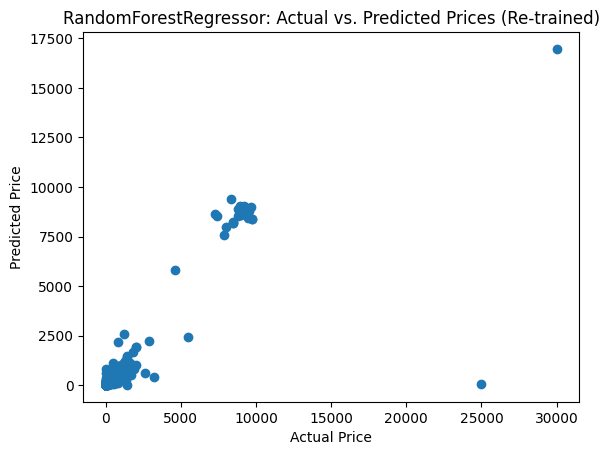

In [28]:
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("RandomForestRegressor: Actual vs. Predicted Prices (Re-trained)")
plt.show()

## Final Task

### Subtask:
Summarize the findings from the re-evaluation, compare the performance with the previous models, and determine if the project objectives have been met or if further improvements are necessary.


## Summary:

### Q&A
The project objectives regarding model performance cannot be fully determined from the provided information, as performance metrics for previous models are not available for comparison.

### Data Analysis Key Findings
*   The re-trained `RandomForestRegressor` model achieved an R2 score of approximately 0.733 on the test set.
*   The re-trained model exhibited a Mean Absolute Error (MAE) of 35.47.
*   The Root Mean Squared Error (RMSE) for the re-trained model was 381.29.
*   A scatter plot visualizing actual versus predicted prices for the re-trained model was generated, showing a positive correlation, indicating the model's ability to capture trends.

### Insights or Next Steps
*   To determine if project objectives have been met, compare these performance metrics (R2, MAE, RMSE) with those of previous models or established benchmarks.
*   Further analysis could involve feature importance to understand which features contribute most to the predictions and potentially lead to further model optimization.
